# Setup

In [ ]:
import datetime
import flopy as fp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

import sys
sys.path.append('D://repos//custom_packages')
import dataviz as dv

# Read from GWV target files

## Path definition

In [48]:
model_cwd = 'D:/MAURICE/MAURICE Model/MAU_v2/MAU_v2_transient/MAU_v2_5_1'
model_name = 'M2v5_1'
date_start = datetime.datetime(2023,9,3)
if not os.path.exists(os.path.join(model_cwd, 'plot')):
    os.makedirs(os.path.join(model_cwd, 'plot'))

## Visualization

### Subplots

In [39]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in target_results.Time]
target_results['Date'] = dates

# Sort from North to South
df_plot = target_results.sort_values('Y', ascending=False).copy()

print('Number of head target points: ', len(target_results.Name.unique()))

Number of head target points:  48


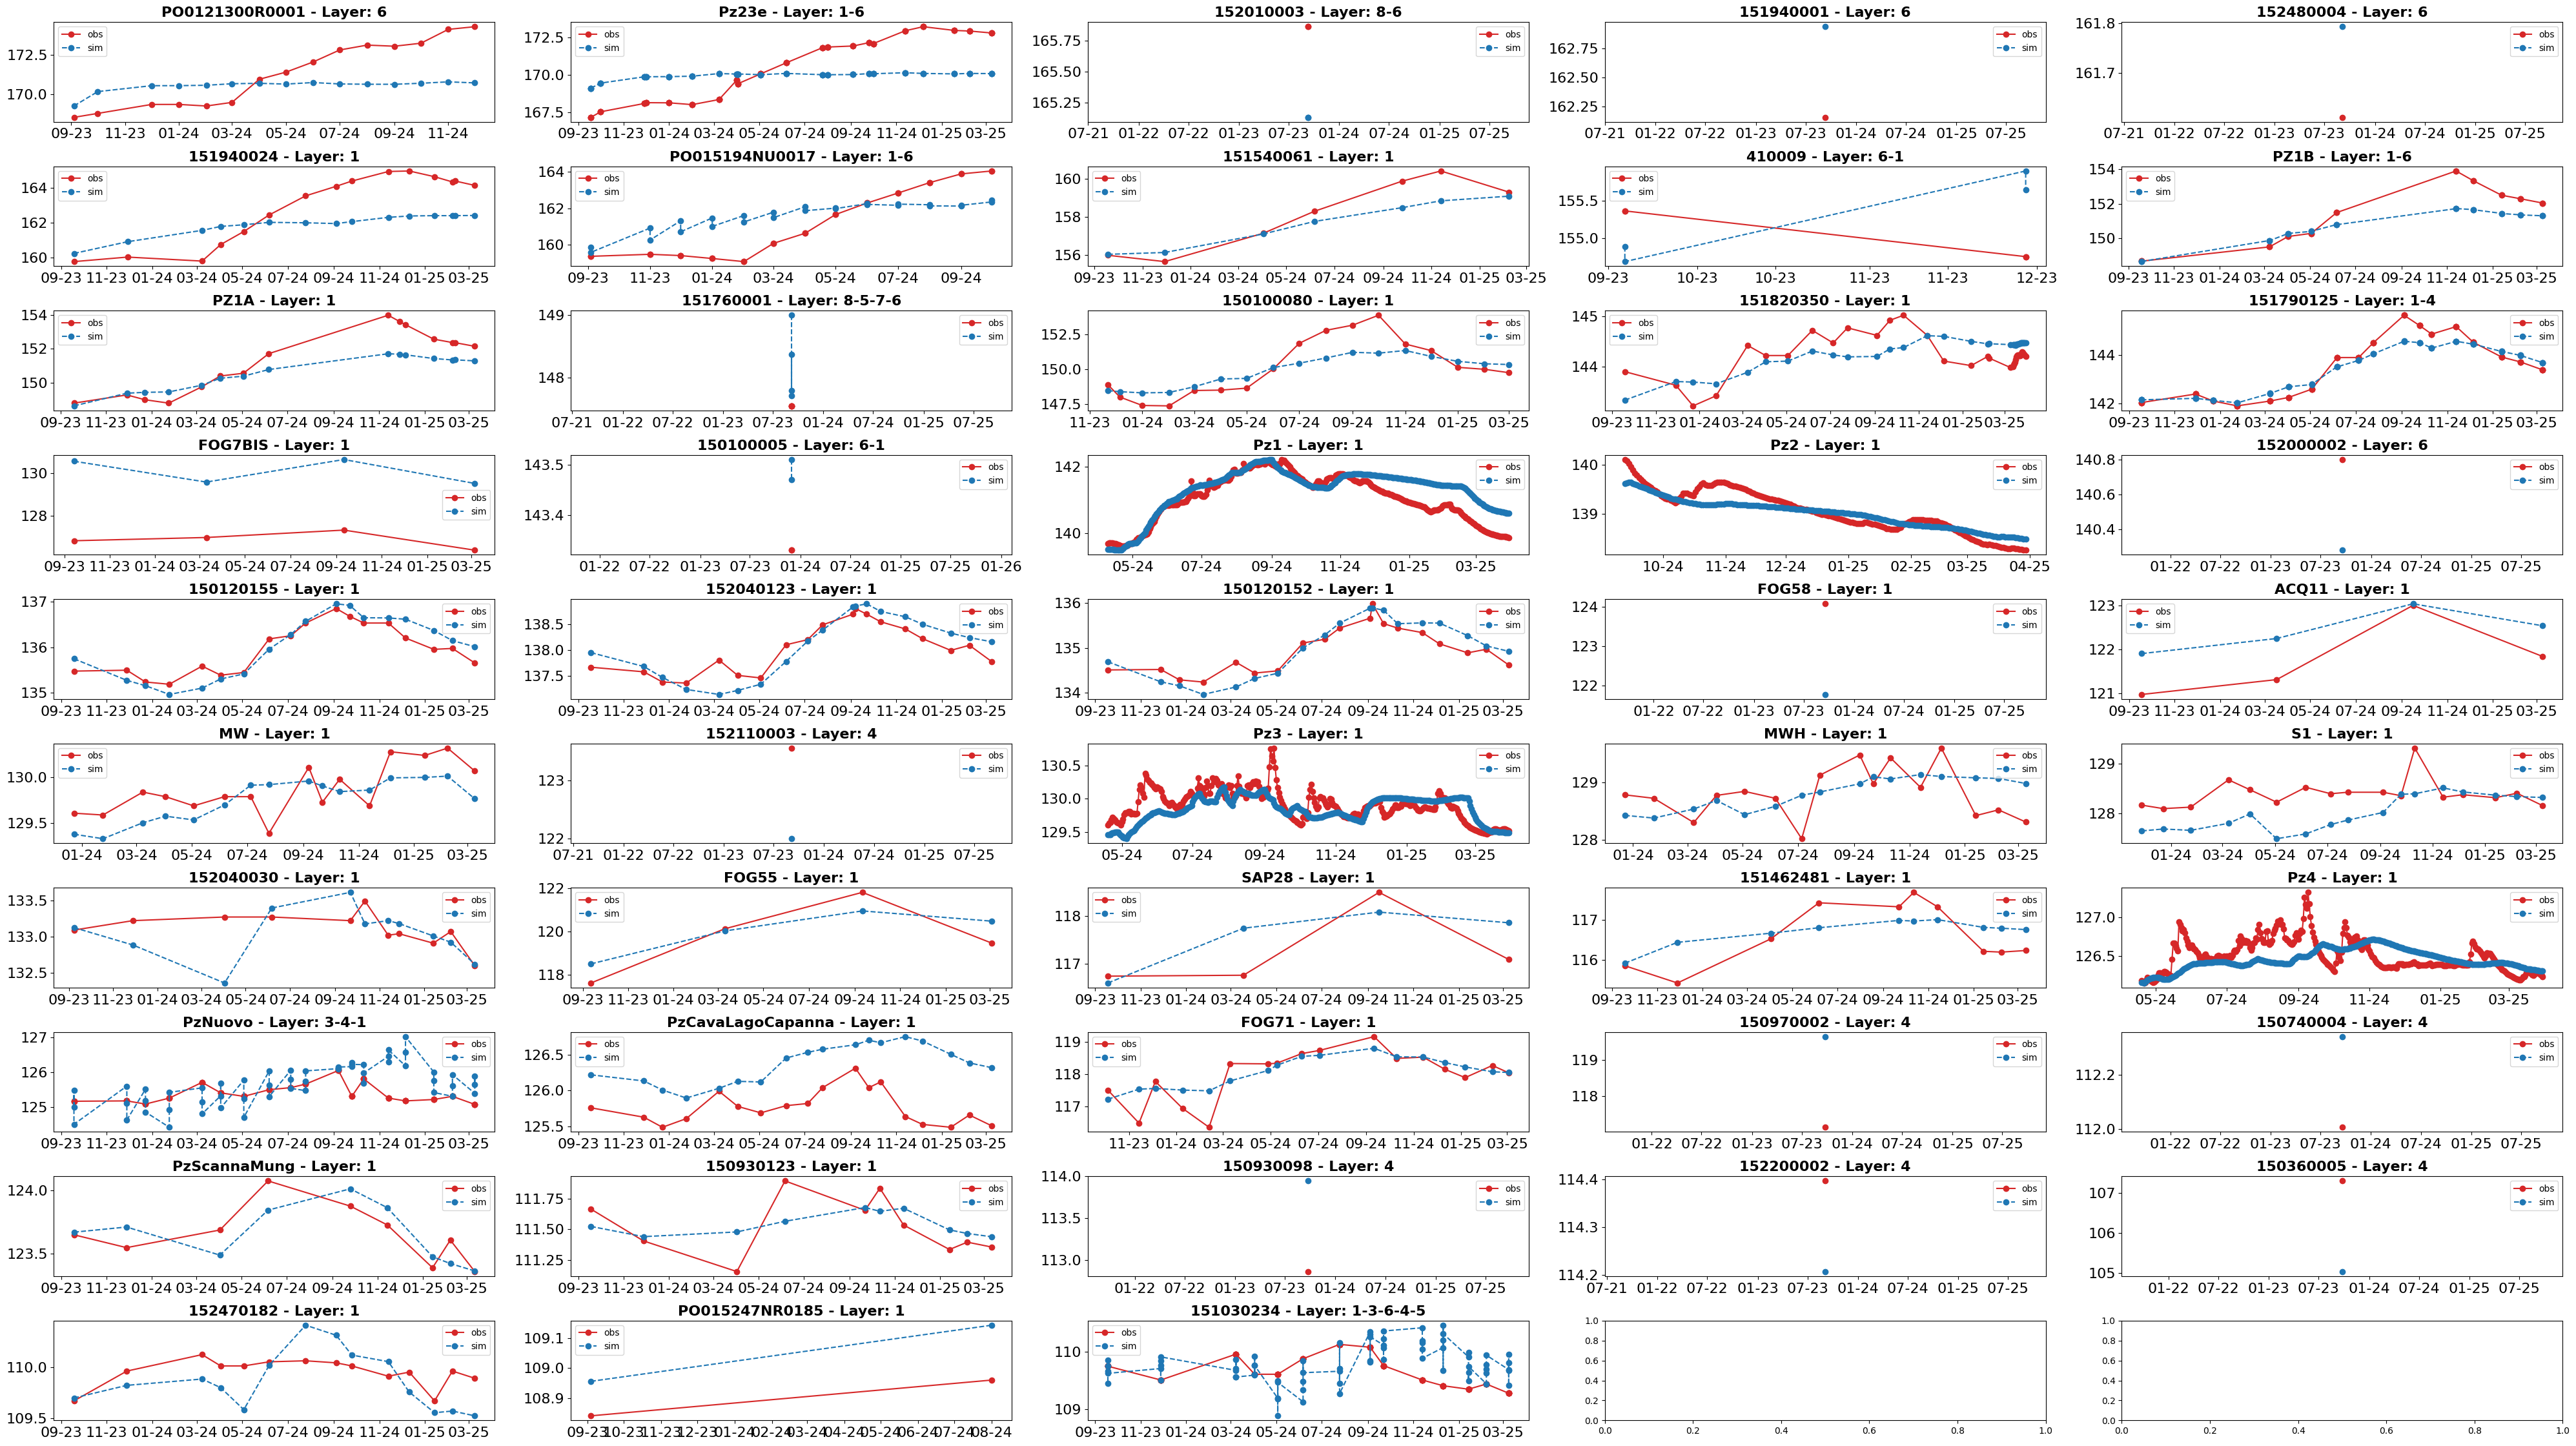

In [40]:
# Visualize subplots
fmt = mdates.DateFormatter('%m-%y')

fig, axes = plt.subplots(10, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

i = 0
for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)
        
    i += 1

fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots.png'), bbox_inches = 'tight', dpi = 300)

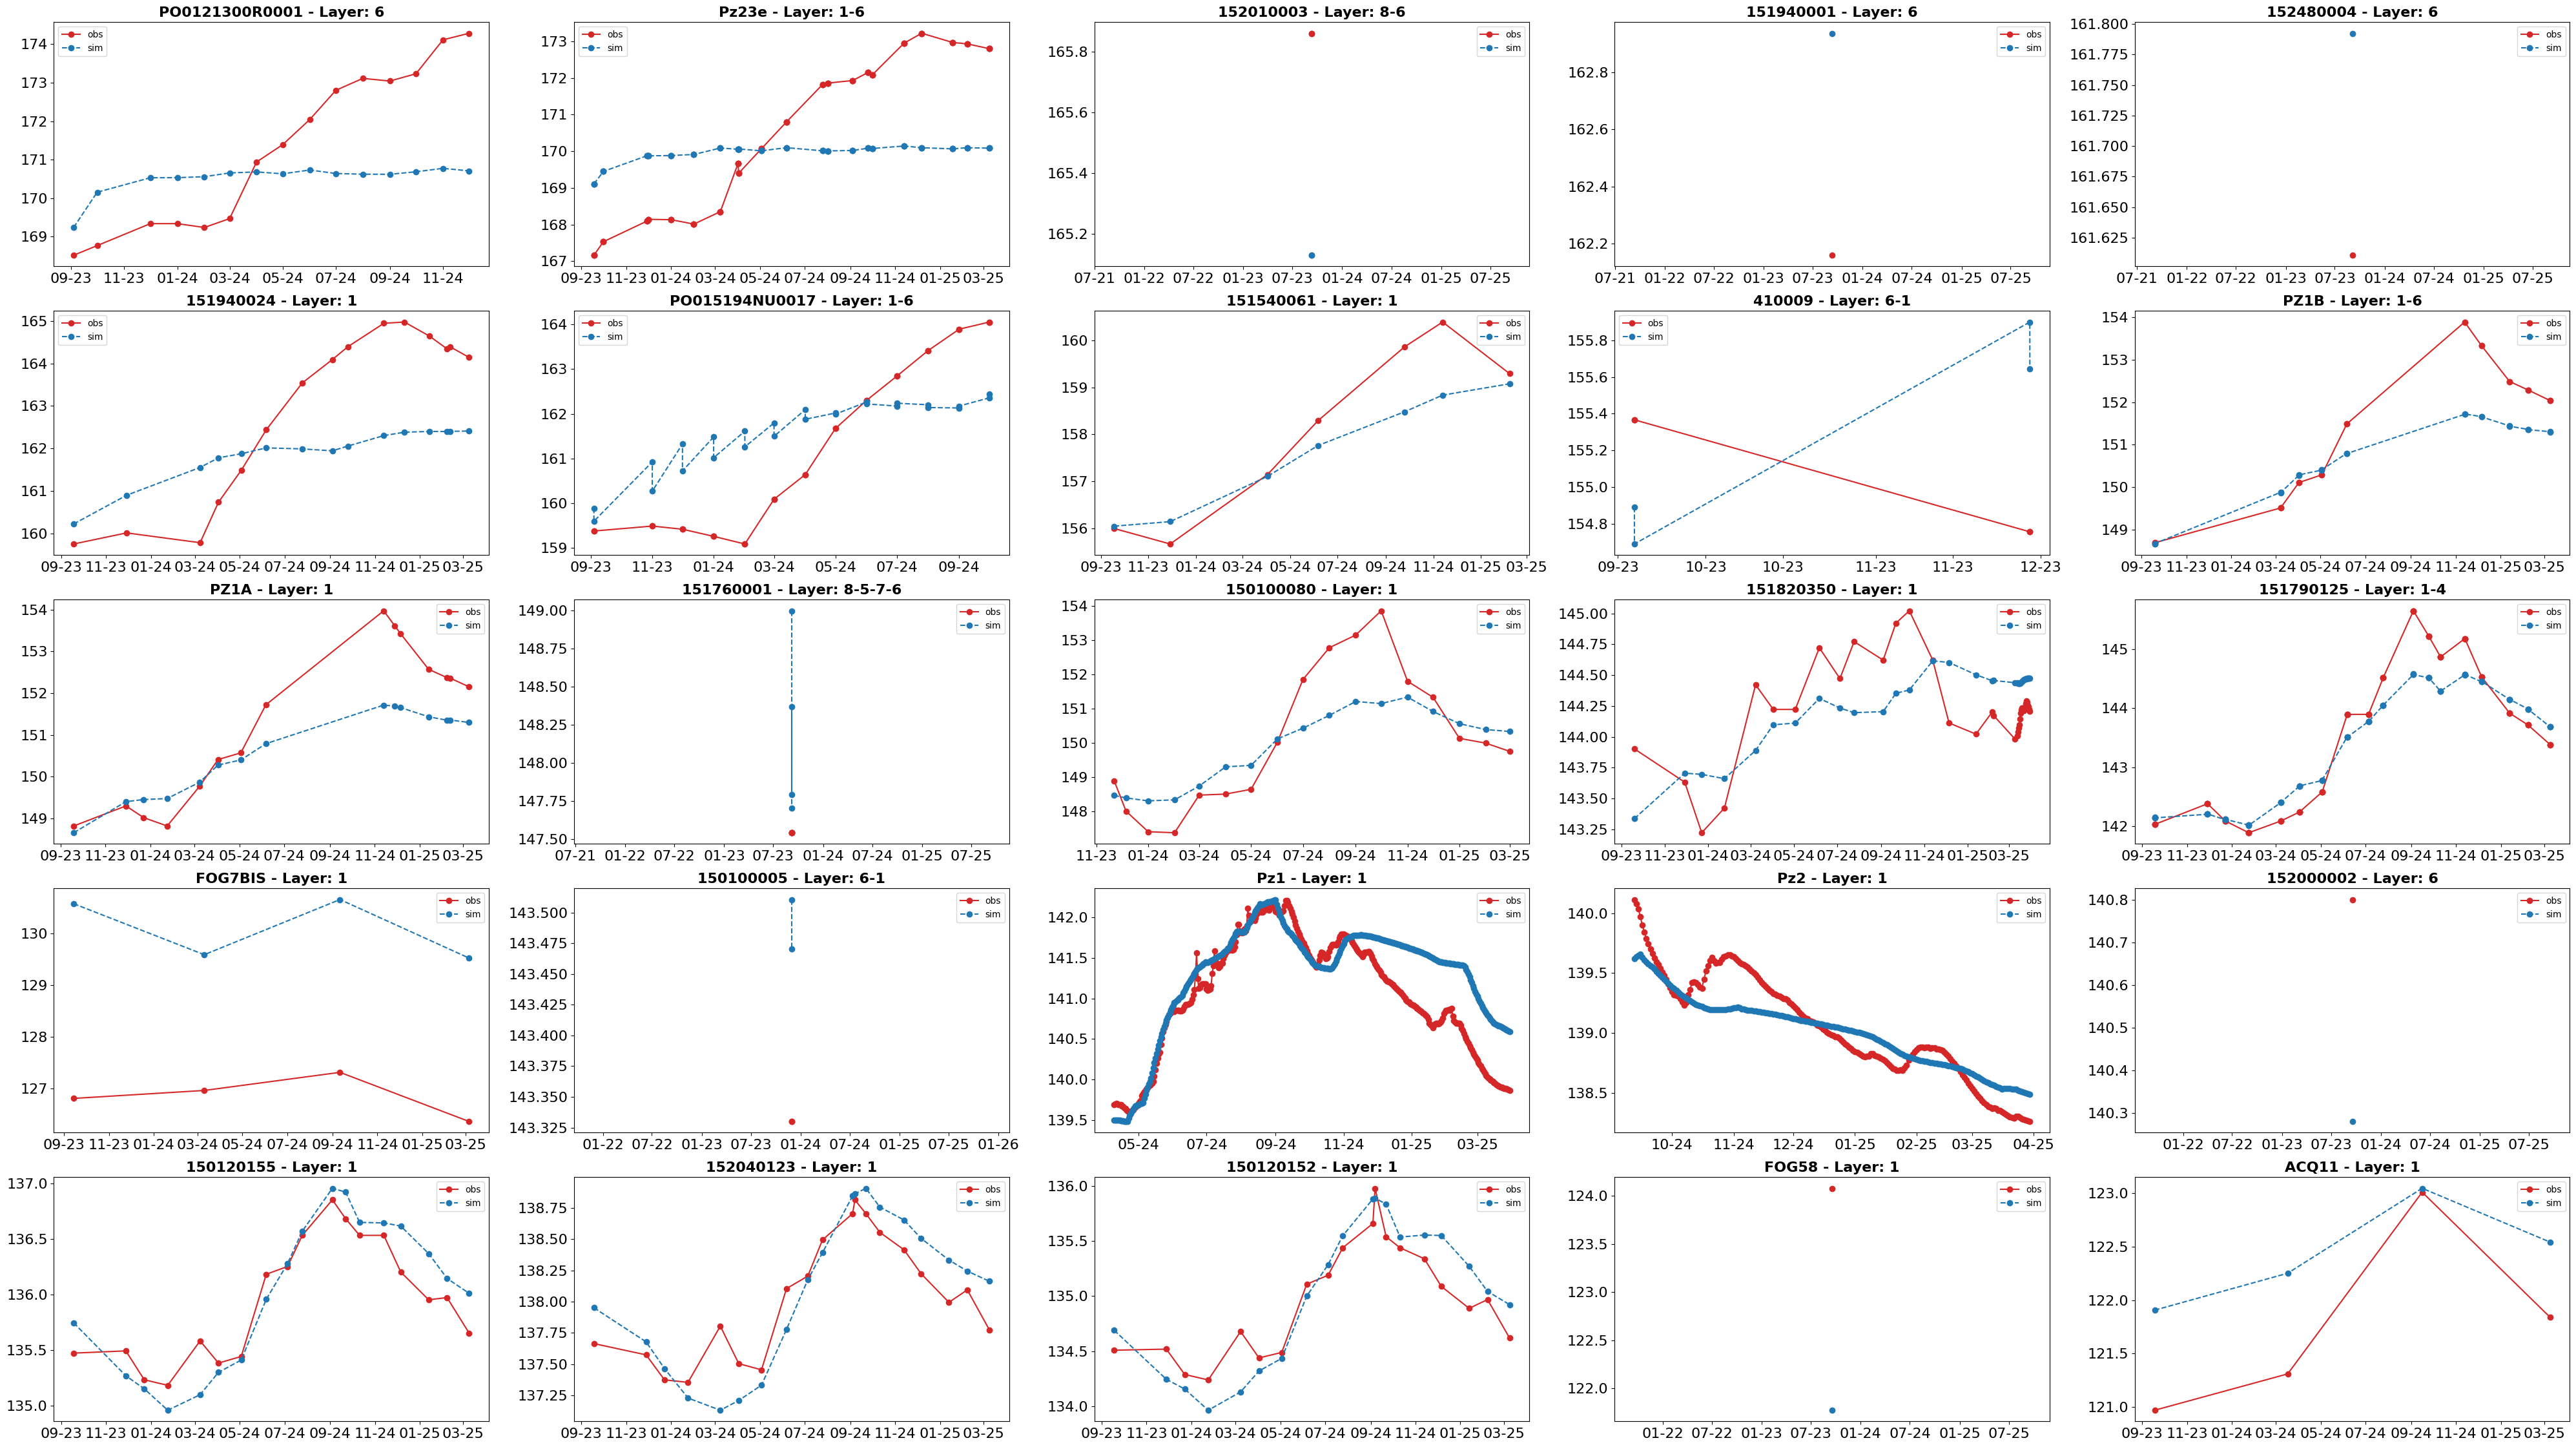

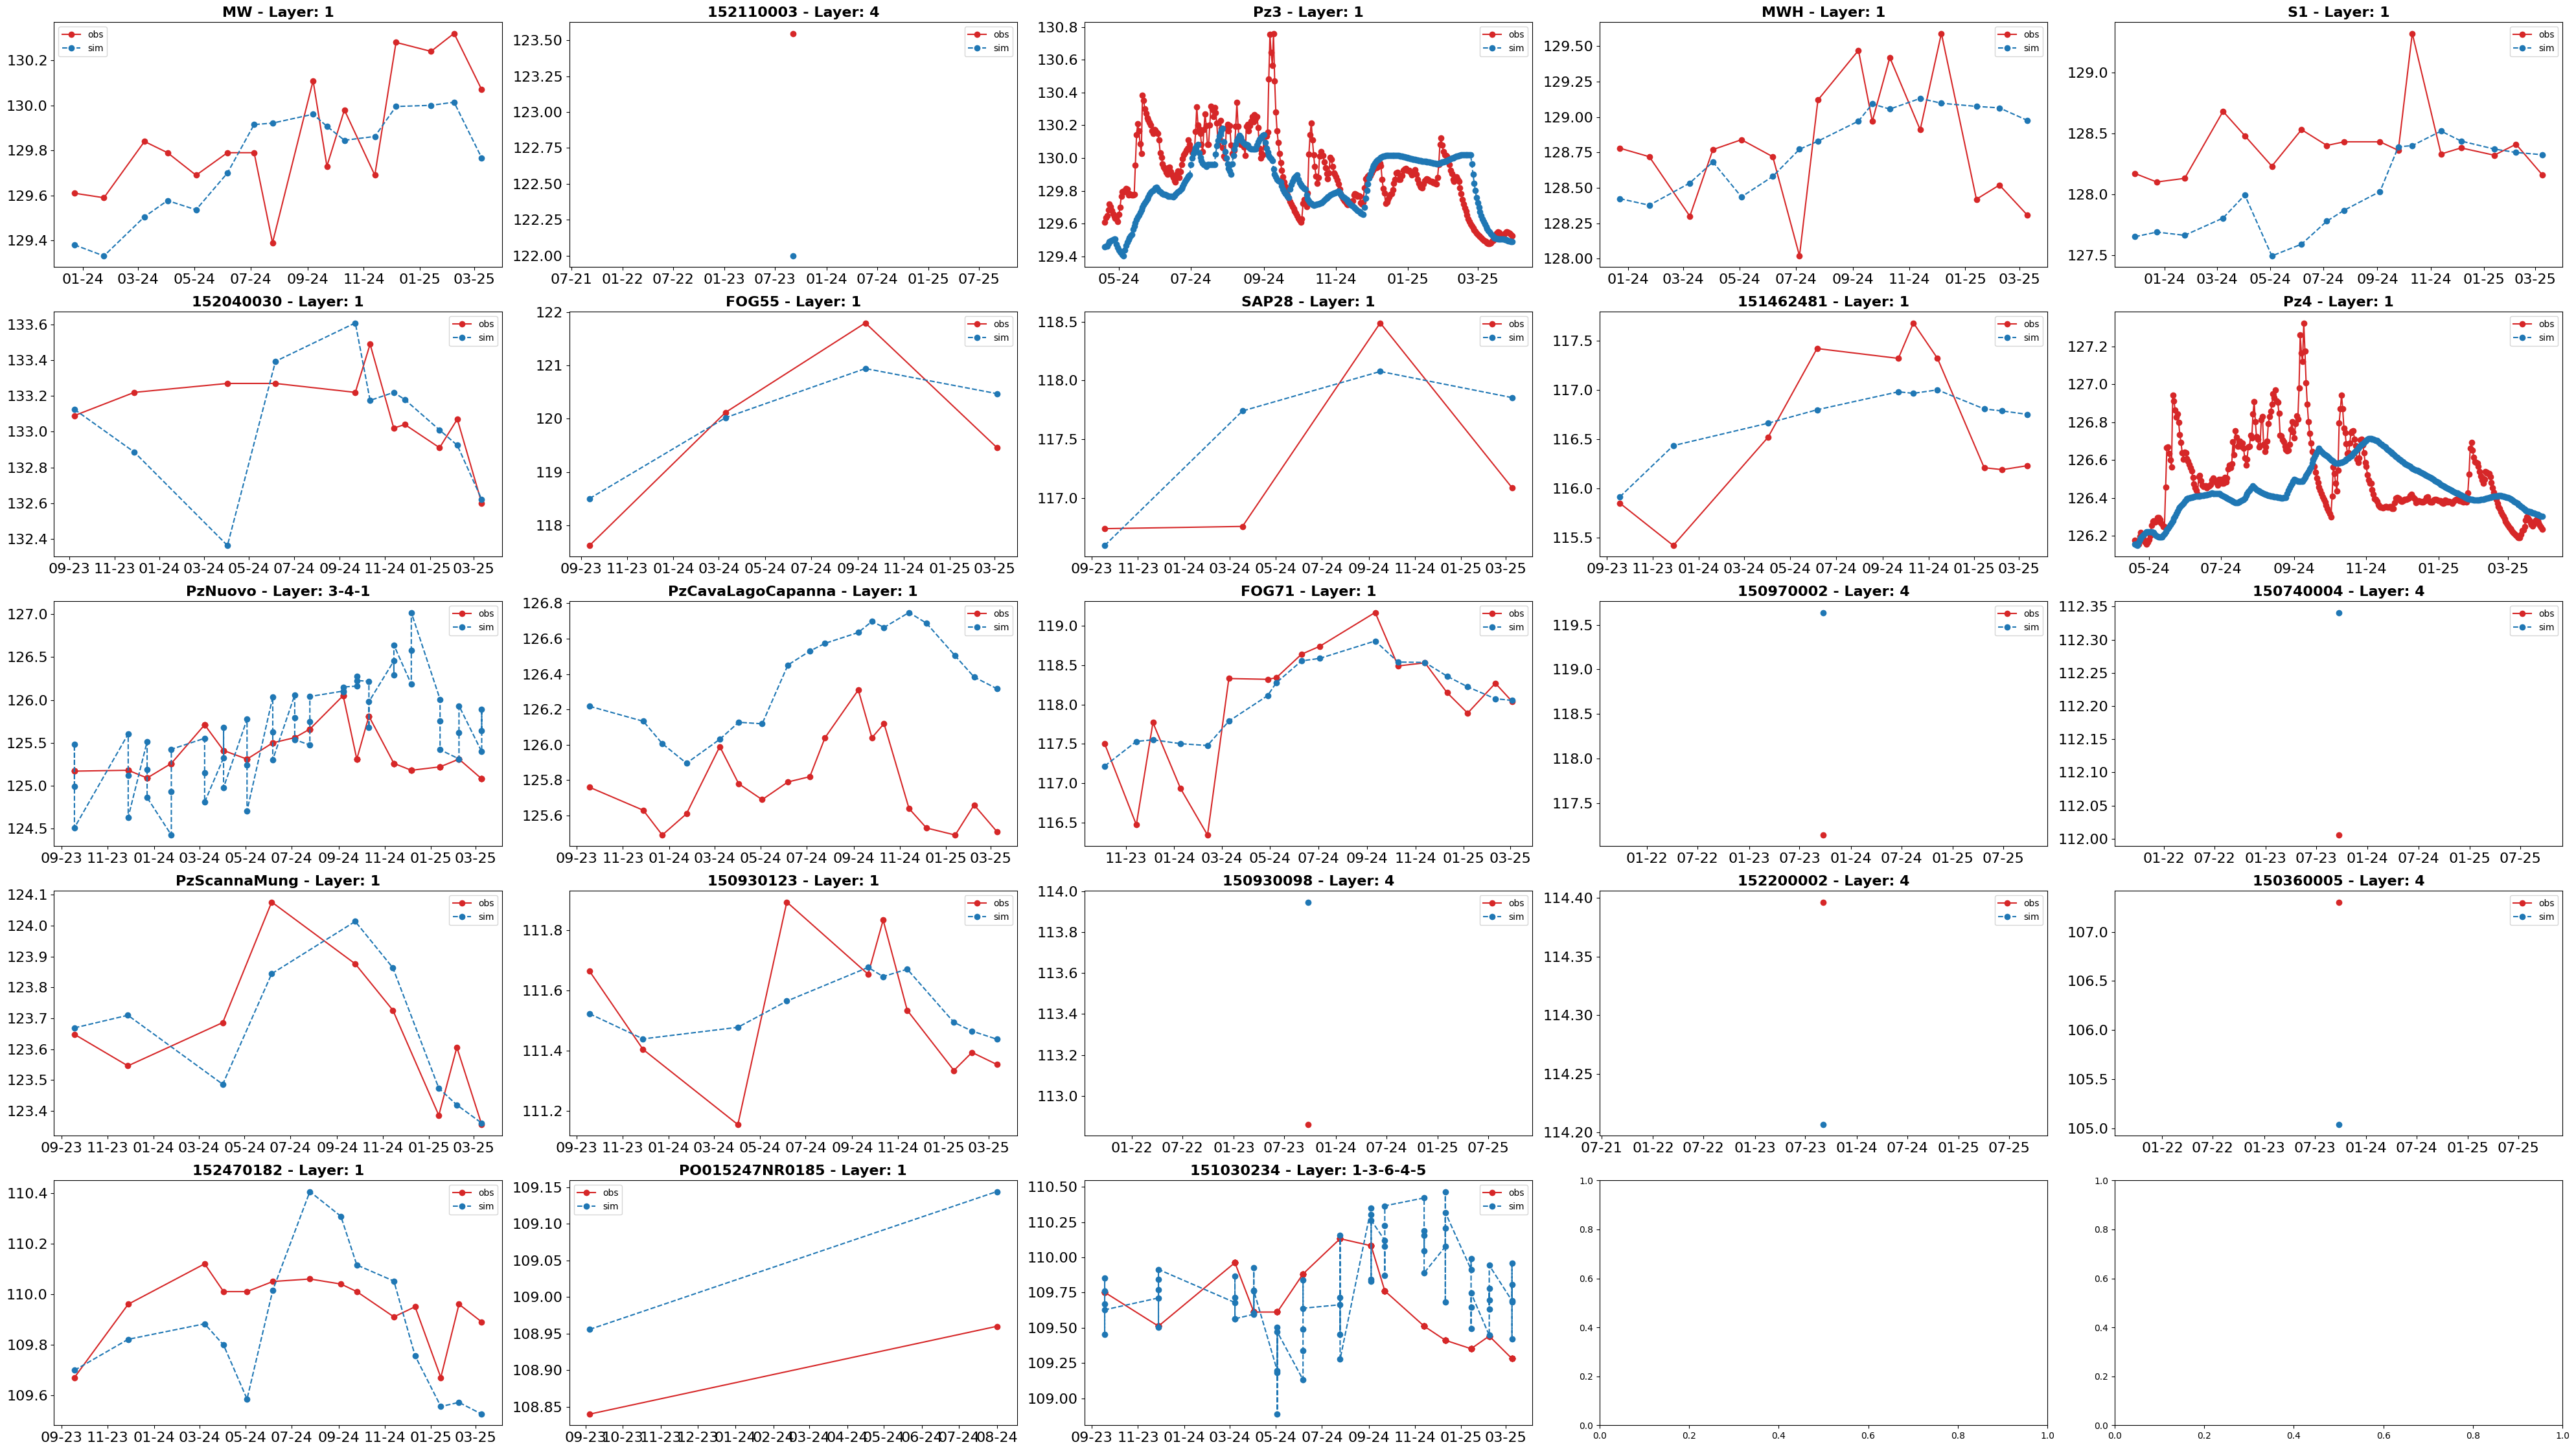

In [41]:
# Visualize subplots, split in 2
fmt = mdates.DateFormatter('%m-%y')

fig, axes = plt.subplots(5, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

i = 0
for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)
        i += 1

fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots-part1.png'), bbox_inches = 'tight', dpi = 300)

fig, axes = plt.subplots(5, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)  
        i += 1

fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots-part2.png'), bbox_inches = 'tight', dpi = 300)

### Scatterplot obs vs sim

In [42]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

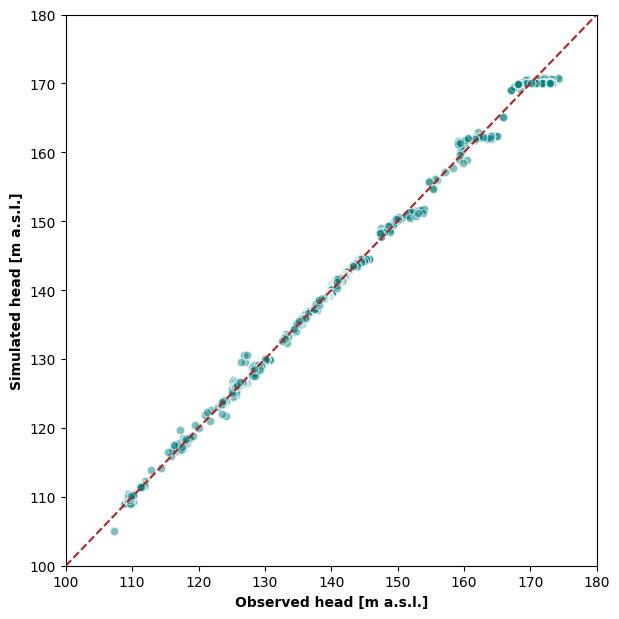

In [43]:
fig, ax = plt.subplots(1,1, figsize = dv.cm2inch(8*2, 8*2))

sns.scatterplot(df_plot, x = 'Observed', y = 'Simulated', marker = '.', ax = ax, alpha = 0.5,
                s = 150, color = 'teal')

ax.axline((0,0), (180,180), color='firebrick', linestyle='--')
ax.set_xlim(100,180)
ax.set_ylim(100,180)

ax.set_xlabel('Observed head [m a.s.l.]', fontweight = 'bold')
ax.set_ylabel('Simulated head [m a.s.l.]', fontweight = 'bold')
fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'obs-vs-sim.png'), bbox_inches = 'tight', dpi = 300)

### Selected points

In [49]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in target_results.Time]
target_results['Date'] = dates

<Axes: xlabel='Date'>

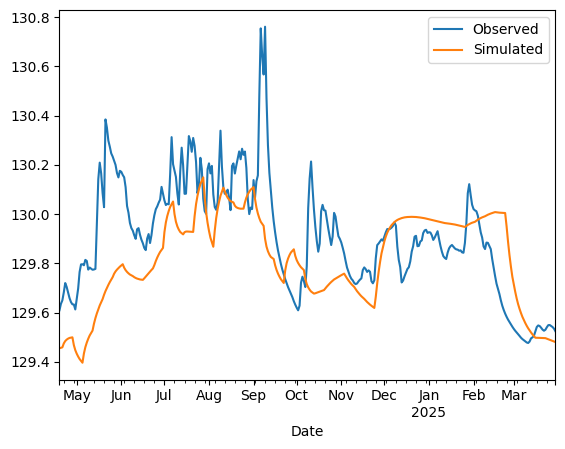

In [51]:
target_results.loc[target_results.Name == 'Pz3', ['Observed', 'Simulated', 'Date']].set_index('Date').plot()

#### Weekly dataloggers

In [ ]:
weeks = pd.date_range('2023-09-03', '2025-03-30', freq='W-SUN')
weeks = pd.DataFrame({
    'sp': [f'SP{i}' for i in range(1, len(weeks)+1)],
    'weeks': weeks
})
weeks.drop(weeks.index[-1], inplace=True)

,sp,weeks
72,SP73,2025-01-19
73,SP74,2025-01-26
74,SP75,2025-02-02
75,SP76,2025-02-09
76,SP77,2025-02-16
77,SP78,2025-02-23
78,SP79,2025-03-02
79,SP80,2025-03-09
80,SP81,2025-03-16
81,SP82,2025-03-23


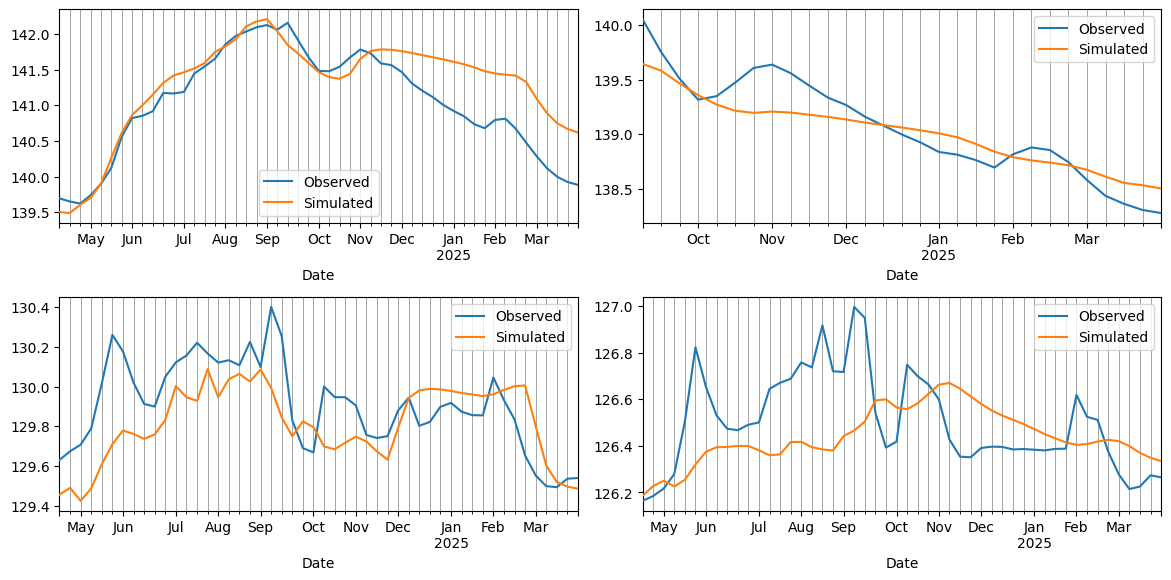

In [66]:
points = ['Pz1', 'Pz2', 'Pz3', 'Pz4']

fig, axes = plt.subplots(2,2, figsize = dv.cm2inch(30, 15))

for p, ax in zip(points, axes.flatten()):
    target_results.loc[target_results.Name == p, ['Observed', 'Simulated', 'Date']].set_index('Date').resample('1W').mean().plot(ax = ax, zorder = 10)
    for _, row in weeks.iterrows():
        ax.axvline(row.weeks, zorder= 1, linewidth = 0.5, color = 'gray')
        # ax.text(row.weeks, ax.get_ylim()[1]+0.1, re.sub("[^0-9]", "", row.sp), fontsize = 10) # non funziona

fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'weekly-resampled.png'), bbox_inches = 'tight', dpi = 300)

<Axes: xlabel='Date'>

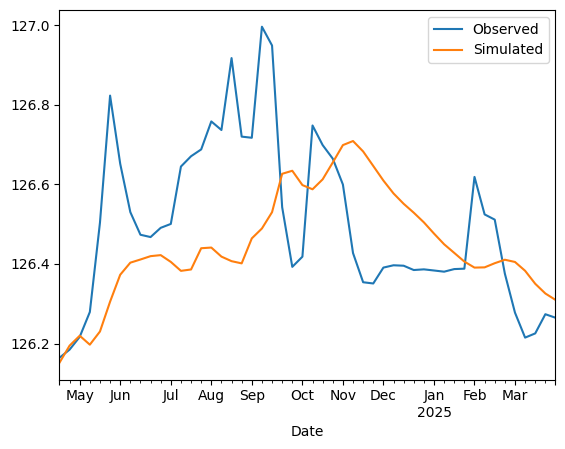

In [46]:
target_results.loc[target_results.Name == 'Pz4', ['Observed', 'Simulated', 'Date']].set_index('Date').resample('1W').mean().plot()

<Axes: xlabel='Date'>

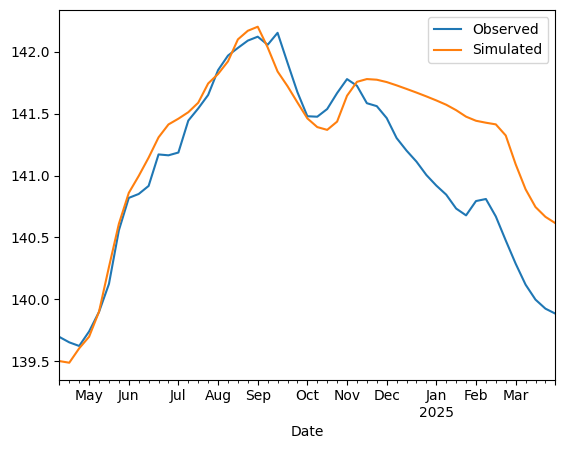

In [47]:
target_results.loc[target_results.Name == 'Pz1', ['Observed', 'Simulated', 'Date']].set_index('Date').resample('1W').mean().plot()

<Axes: xlabel='Date'>

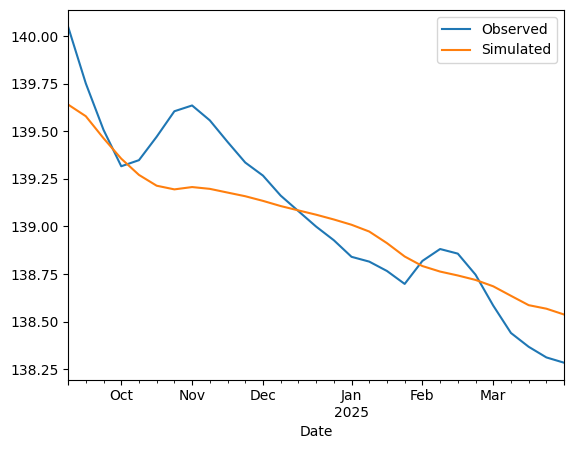

In [12]:
target_results.loc[target_results.Name == 'Pz2', ['Observed', 'Simulated', 'Date']].set_index('Date').resample('1W').mean().plot()

### Difference in heads with another model

In [187]:
# Reference SP
sp_ref = 82 # 78: end of irr, 82: end of simulation, before irrigation season
# Reference layer
layer = 1
# Model 1
model_cwd_1 = model_cwd
model_name_1 = model_name
# Model 2
model_cwd_2 = 'D:/MAURICE/MAURICE Model/MAU_v2/MAU_v2_transient/MAU_v2_4_1'
model_name_2 = 'M2v4_1'

In [132]:
# If ModflowUSG
nodes_ref = pd.read_csv('D:/MAURICE/MAURICE Model/MAU_v2/props_for_postprocessing/nodes_row_column.csv')

In [172]:
# Load .hds file
# Since the model is in MODFLOW-USG, HeadUFile is needed
# Otherwise, use HeadFile
def get_hds2d(hds1d, nodes_ref, layer, ts, sp):
    hds1d = hds1d.get_data(kstpkper = (ts-1, sp-1))[layer-1]
    hds2d = np.zeros(shape = (nodes_ref.row.max(), nodes_ref.column.max()))
    for r in range(hds2d.shape[0]):
        for c in range(hds2d.shape[1]):
            hds2d[r,c] = hds1d[nodes_ref.loc[(nodes_ref.row == r+1) & (nodes_ref.column == c+1)].node.values[0]-1]
    return hds2d

In [119]:
hds1 = fp.utils.binaryfile.HeadUFile(os.path.join(model_cwd_1, f'{model_name_1}.hds'))
hds2 = fp.utils.binaryfile.HeadUFile(os.path.join(model_cwd_2, f'{model_name_2}.hds'))

In [188]:
hds12d = get_hds2d(hds1, nodes_ref, layer, 5, sp_ref) # 18s, could be improved
hds22d = get_hds2d(hds2, nodes_ref, layer, 5, sp_ref) # 18s, could be improved

In [189]:
diff = hds12d-hds22d

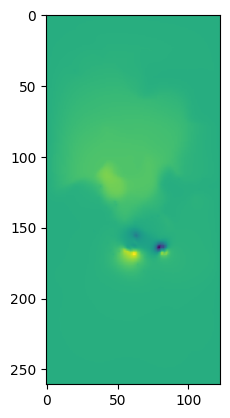

In [190]:
plt.imshow(diff)

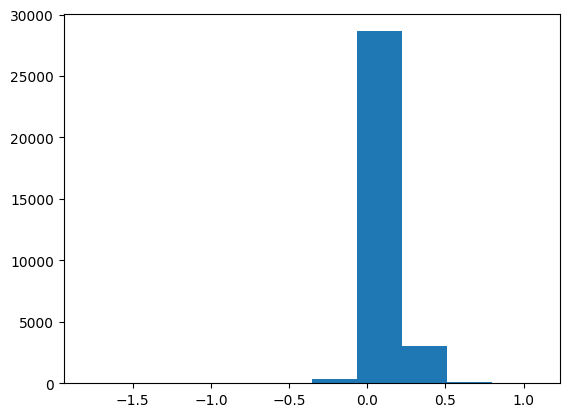

In [191]:
plt.hist(diff.flatten(), bins=10)
plt.show()

In [192]:
(diff*0.2*100*100).sum()

np.float64(3873796.4935302734)

In [183]:
hds12d = get_hds2d(hds1, nodes_ref, 2, 5, sp_ref) # 18s, could be improved
hds22d = get_hds2d(hds2, nodes_ref, 2, 5, sp_ref) # 18s, could be improved

In [186]:
diff = hds12d - hds22d
(diff*0.2*100*100).sum()

np.float64(637.4053955078125)